# Computer Vision To Translate Letters In American Sign Language
## This is the notebook for my final project for Data Mining.  
### The Goal of this project is the following:  
There are over 500 thousand people who live in the United States in which their native language is that of American Sign Language. The issue however is that people who use ASL as there only way to communicate struggle with holding conversations with people who do not possess the understanding of Sign Language. This project I plan to provide an overview of data from alphabetical signals in sign language, including data preparation, exploratory data analysis, modeling, and evaluation to build a computer vision model to translate sign language with high accuracy using three different algorithms.

# Imports
### Below are the imports necessary to run this Notebook

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from glob import glob 
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load Data
### The Dataset being loaded is a customized version of the ASL Alphabet Dataset on Kaggle at https://www.kaggle.com/datasets/grassknoted/asl-alphabet
### The Alteration to the dataset is that I removed all images that do not represent the letters A-J before loading in the data to make the file size more manageable.


### Set the dataset path and create a list of the labels in the dataset and see how many labels there are and what each label is.

In [2]:
### Set path for data
data = '/kaggle/input/asl10letters/asl_alphabet_train/asl_alphabet_train'

### Get a list of subdirectories of the train_path
labels = os.listdir(data)  
labels.sort()

print('There are',len(labels),'ASL letters in this dataset.')
print('The letters are that are in the dataset are:',labels,'.\n')

for label in labels:
    print(f'No. of images present in {label}: {len(os.listdir(os.path.join(data,label)))}')

There are 10 ASL letters in this dataset.
The letters are that are in the dataset are: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'] .

No. of images present in A: 3000
No. of images present in B: 3000
No. of images present in C: 3000
No. of images present in D: 3000
No. of images present in E: 3000
No. of images present in F: 3000
No. of images present in G: 3000
No. of images present in H: 3000
No. of images present in I: 3000
No. of images present in J: 3000


### Plot an image for each of the label in the dataset

<Figure size 640x480 with 0 Axes>

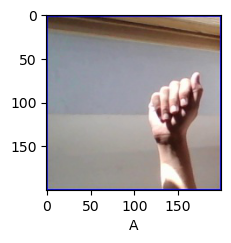

In [3]:
def plot_image():
    figure = plt.figure()
    plt.figure(figsize=(16,5))

    plt.subplot(2,5,2)
    path = data + "/{0}/{0}1000.jpg".format(labels[0])
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(labels[0])
        
plot_image()

<Figure size 640x480 with 0 Axes>

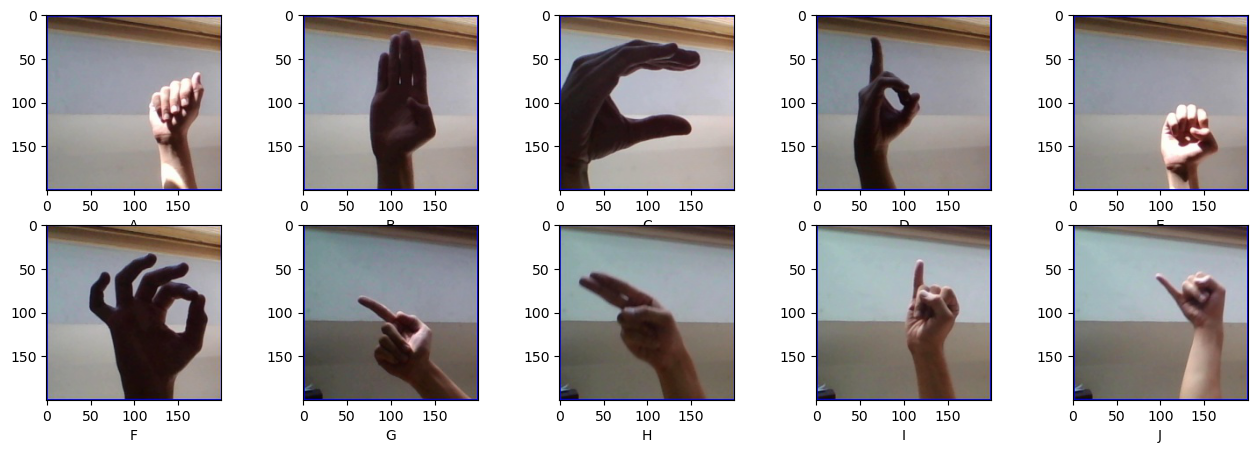

In [4]:
def plot_images():
    figure = plt.figure()
    plt.figure(figsize=(16,5))

    for i in range(10):
        plt.subplot(2,5,i+1)
        path = data + "/{0}/{0}1000.jpg".format(labels[i])
        img = plt.imread(path)
        plt.imshow(img)
        plt.xlabel(labels[i])
        
plot_images()

<Figure size 640x480 with 0 Axes>

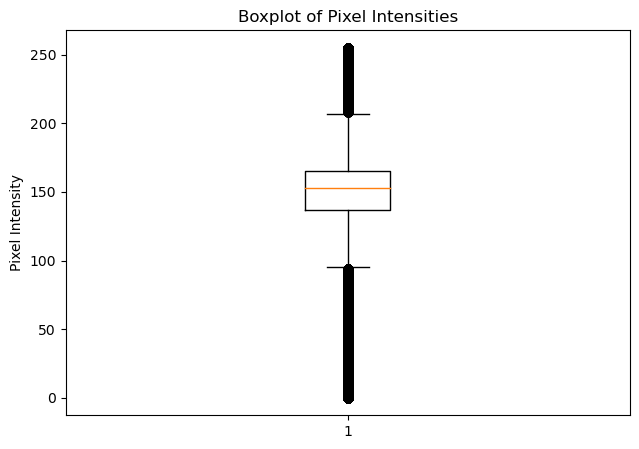

In [5]:
def box_plot_image():
    figure = plt.figure()
    plt.figure(figsize=(16,5))

    plt.subplot(1,2,1)
    path = data + "/{0}/{0}1000.jpg".format(labels[0])
    img = plt.imread(path)
    pixel_values = img.flatten()
    plt.boxplot(pixel_values)
    plt.title("Boxplot of Pixel Intensities")
    plt.ylabel("Pixel Intensity")
    plt.show()
        
box_plot_image()

# Preprocess Data

### In this cell we go through every image in the dataset and Change the color of it to be grayscaled, resize the image to 64x64 and lastly normalize the image. We also put all the labels into and array.

In [6]:
# Resive every Image to Grayscale and resize to 64x64 as well as normalize the data
paths = glob("../input/asl10letters/asl_alphabet_train/asl_alphabet_train/*/*")
images = []
labels = []
for path in paths:
    label = path.split("/")[-2]
    if labels.count(label) <= 600:
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Simplifies algorithms
        image = cv2.equalizeHist(image) #Improve Contrast even further
        image = cv2.resize(image,(64,64)) # Make all Images the same size
        image = image/255.0 # Normalize the images
        images.append(image)
        labels.append(label)

images = np.array(images)
labels = np.array(labels)

### In this cell you use label encoder from sklearn to transform the label array to be categorical values through the to_categorical function of keras.

In [7]:
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_one_hot = to_categorical(labels_encoded)

In [8]:
labels_one_hot

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

### In this cell seperate the data into both training, testing datasets through sklearn train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)

# Reshape the our X values or images for the model.

In [10]:
X_train = X_train.reshape(-1, 64, 64, 1)
X_test = X_test.reshape(-1, 64, 64, 1)

# Further Image Testing

In [11]:
def display_images(images, labels, n=5):
    plt.figure(figsize=(15, 15))

    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(images[i].reshape(64, 64), cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')

    plt.show()

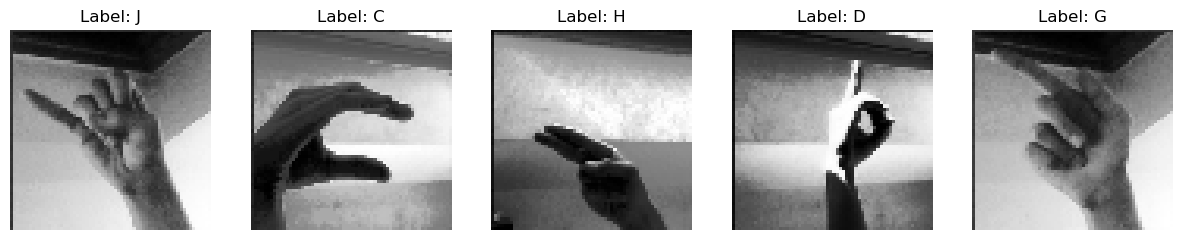

In [12]:
n = 5
display_images(X_train[:n], label_encoder.inverse_transform(np.argmax(y_train[:n], axis=1)), n=n)

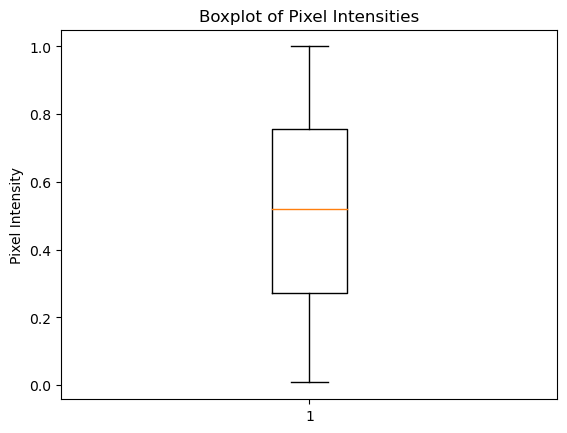

In [13]:
pixel_values = images[0].flatten()
plt.boxplot(pixel_values)
plt.title("Boxplot of Pixel Intensities")
plt.ylabel("Pixel Intensity")
plt.show()


# Further Label Testing

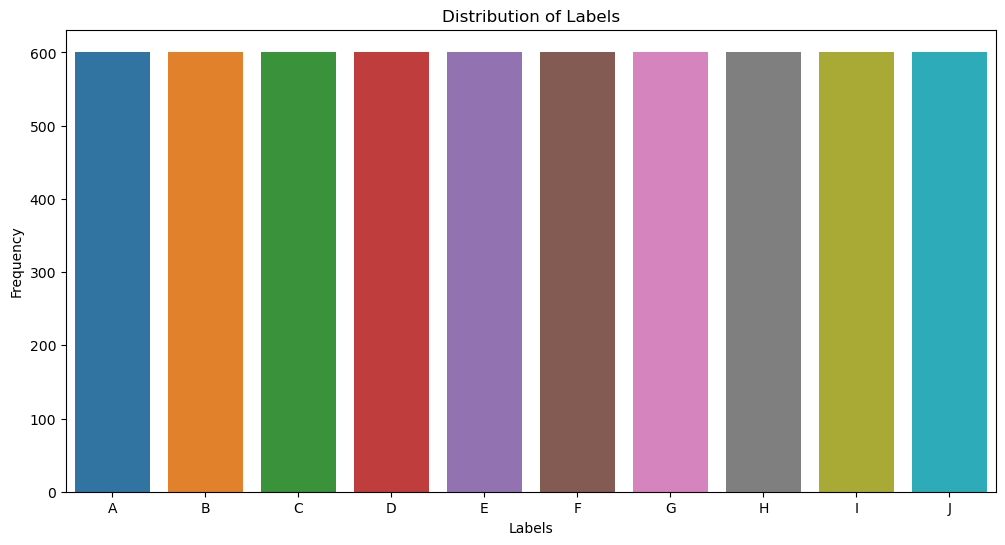

In [14]:
def plot_label_distribution(labels):
    label_df = pd.DataFrame(labels, columns=["label"])
    plt.figure(figsize=(12, 6))
    sns.countplot(x="label", data=label_df, order=sorted(label_df["label"].unique()))
    plt.title("Distribution of Labels")
    plt.xlabel("Labels")
    plt.ylabel("Frequency")
    plt.show()

plot_label_distribution(labels)

## Perform Dimension Reduction using PCA

In [15]:
from sklearn.decomposition import PCA

# Flatten the image data for PCA
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Apply PCA to retain 95% of the variance in the data
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

print("Original dimensions:", X_train_flat.shape[1])
print("Reduced dimensions:", X_train_pca.shape[1])


Original dimensions: 4096
Reduced dimensions: 132


## Check for Multicollinearity Problems

In [16]:
correlation_matrix = np.corrcoef(X_train_flat.T)
correlation_matrix_pca = np.corrcoef(X_train_pca.T)

import pandas as pd

def create_high_correlation_table(correlation_matrix, threshold=0.8):
    correlated_features = []
    for i in range(correlation_matrix.shape[0]):
        for j in range(i+1, correlation_matrix.shape[1]):
            if abs(correlation_matrix[i, j]) > threshold:
                correlated_features.append((i, j, correlation_matrix[i, j]))

    correlation_df = pd.DataFrame(correlated_features, columns=["Feature 1", "Feature 2", "Correlation"])
    correlation_df = correlation_df.sort_values(by="Correlation", ascending=False)

    return correlation_df



high_correlation_table_pca = create_high_correlation_table(correlation_matrix_pca, threshold=0.8)
high_correlation_table = create_high_correlation_table(correlation_matrix, threshold=0.8)
print(high_correlation_table.head(10))
print("\n\n")
print(high_correlation_table_pca.head(10))


        Feature 1  Feature 2  Correlation
9002          120        121     0.999250
191446       3716       3780     0.999241
183465       3585       3649     0.999222
187566       3649       3713     0.999188
174291       3458       3522     0.999162
169043       3393       3457     0.999128
187848       3652       3716     0.999123
163833       3330       3394     0.999114
183677       3587       3651     0.999105
197087       3845       3909     0.999092



Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []


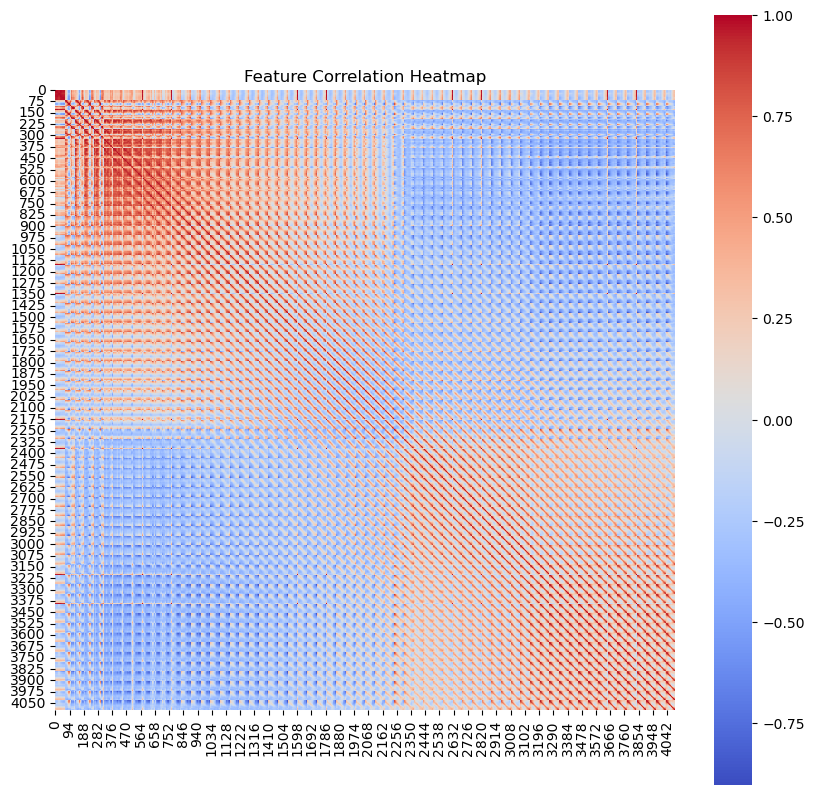

In [17]:
def plot_correlation_heatmap(correlation_matrix):
    plt.figure(figsize=(10, 10))
    sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, cbar=True, square=True)
    plt.title("Feature Correlation Heatmap")
    plt.show()

    
plot_correlation_heatmap(correlation_matrix)

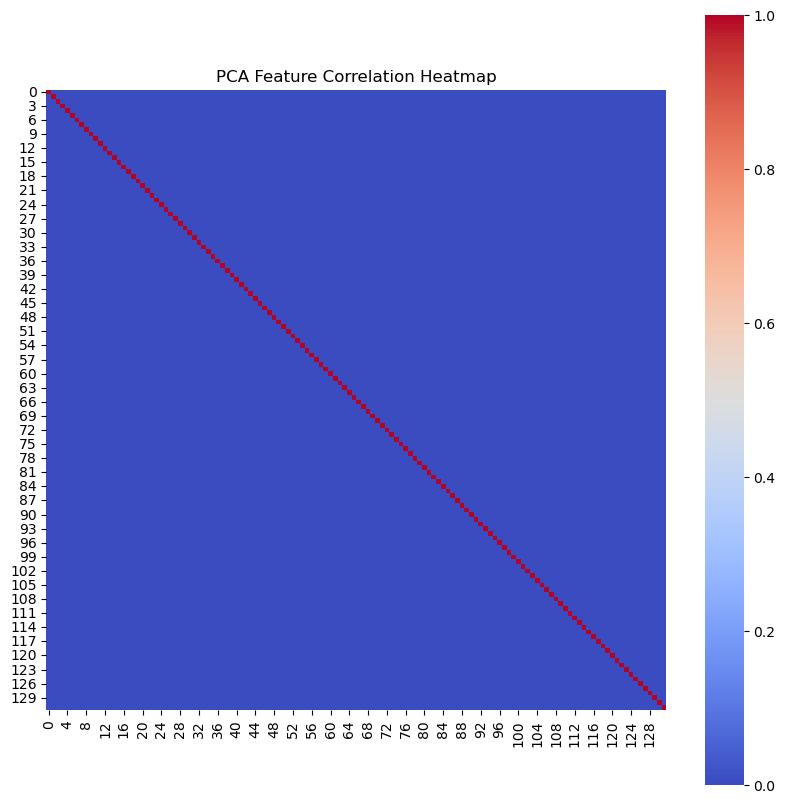

In [18]:
def plot_pca_correlation_heatmap(correlation_matrix):
    plt.figure(figsize=(10, 10))
    sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, cbar=True, square=True)
    plt.title("PCA Feature Correlation Heatmap")
    plt.show()

    
plot_pca_correlation_heatmap(correlation_matrix_pca)


# Support Vector Machines


Support Vector Machine (SVM) is a supervised machine learning algorithm primarily used for classification and regression tasks. The main idea behind SVM is to find the optimal hyperplane that best separates data points belonging to different classes. The hyperplane is chosen in a way that maximizes the margin, which is the distance between the hyperplane and the nearest data points from each class. These nearest data points are called support vectors, as they "support" the position of the hyperplane. SVM can handle both linear and non-linear classification problems by using kernel functions to transform the data into higher-dimensional spaces, making it easier to find a separating hyperplane.




## Main Hyperparameters
C (Cost or Regularization parameter): This parameter controls the trade-off between maximizing the margin and minimizing the classification error. A smaller value of C creates a wider margin, allowing some misclassifications, which may result in a more generalized model. A larger value of C, on the other hand, aims for a smaller margin with fewer or no misclassifications, potentially leading to overfitting.

Kernel: The kernel function is used to transform the input data into a higher-dimensional space, enabling SVM to handle non-linear classification problems. Common kernel functions include linear, polynomial, radial basis function (RBF), and sigmoid. Choosing the right kernel function is crucial, as it can significantly impact the performance of the SVM model.

Degree (for polynomial kernel): This parameter determines the degree of the polynomial kernel function. A higher degree increases the complexity of the model, making it more prone to overfitting, while a lower degree may result in underfitting.

Gamma (for RBF and polynomial kernels): Gamma controls the shape of the decision boundary in the transformed feature space. A small value of gamma leads to a more flexible decision boundary, while a large value results in a more rigid decision boundary. The optimal value of gamma depends on the specific problem and dataset.

Coefficient (for polynomial and sigmoid kernels): This parameter, often denoted as 'coef0', controls the independent term in the kernel function. It can influence the flexibility of the decision boundary, especially for non-linear kernels.

## FIRST STEP FIND OUT WHAT IS OPTIMAL X AND Y DATA TO USE

## Base or PCA

In [19]:
X_train, X_test, y_train, y_test = train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)
X_train = X_train.reshape(-1, 64, 64, 1)
X_test = X_test.reshape(-1, 64, 64, 1)

## SVM ON THE BASE X AND Y DATA

In [20]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train = np.reshape(X_train, (X_train.shape[0], -1))
y_train = np.argmax(y_train, axis=1)

X_test = np.reshape(X_test, (X_test.shape[0], -1))
y_test = np.argmax(y_test, axis=1)

# create an SVM classifier object
clf = svm.SVC(kernel='linear')

# train the classifier on the training data
clf.fit(X_train, y_train)

# make predictions on the testing data
y_pred = clf.predict(X_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8361064891846922


## SVM ON THE PCA X AND Y DATA

In [21]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# create an SVM classifier object
clf = svm.SVC(kernel='linear')

# train the classifier on the training data
clf.fit(X_train_pca, y_train)

# make predictions on the testing data
y_pred = clf.predict(X_test_pca)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7737104825291181


## Hyperparmeters for C, Kernel, and Degree(poly kernel)

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
C_values = [0.1, 1, 10]
kernel_values = ['linear', 'rbf', 'poly']
degree_values = [2, 3] # Only applicable for 'poly' kernel

In [23]:
for C in C_values:
    for kernel in kernel_values:
        if kernel == 'poly':
            for degree in degree_values:
                model = SVC(C=C, kernel=kernel, degree=degree)
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                print(f"Model with C={C}, kernel={kernel}, degree={degree}")
                print(classification_report(y_test, y_pred))
                print("------------------------------------------------------------")
        else:
            model = SVC(C=C, kernel=kernel)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            print(f"Model with C={C}, kernel={kernel}")
            print(classification_report(y_test, y_pred))
            print("------------------------------------------------------------")

Model with C=0.1, kernel=linear
              precision    recall  f1-score   support

           0       0.65      0.86      0.74       124
           1       0.85      0.74      0.79       144
           2       0.78      0.93      0.85       107
           3       0.83      0.83      0.83       116
           4       0.79      0.72      0.76       118
           5       0.94      0.71      0.81       123
           6       0.83      0.83      0.83       103
           7       0.90      0.88      0.89       119
           8       0.86      0.90      0.88       125
           9       0.94      0.91      0.93       123

    accuracy                           0.83      1202
   macro avg       0.84      0.83      0.83      1202
weighted avg       0.84      0.83      0.83      1202

------------------------------------------------------------
Model with C=0.1, kernel=rbf
              precision    recall  f1-score   support

           0       0.33      0.60      0.42       124
          

## ANALYSIS OF SVM BASE:

### BEST ACCURACY: 93%
* 10,Poly,3
* 10,rbf
* 1, Poly, 3
### WORST ACCURACY: 46%
* 0.1,rbf

## TEST HYPERPARAMTERS ON PCA

In [24]:
C_values = [0.1, 1, 10]
kernel_values = ['linear', 'rbf', 'poly']
degree_values = [2, 3] # Only applicable for 'poly' kernel

In [25]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

for C in C_values:
    for kernel in kernel_values:
        if kernel == 'poly':
            for degree in degree_values:
                model = SVC(C=C, kernel=kernel, degree=degree)
                model.fit(X_train_pca, y_train)
                y_pred = model.predict(X_test_pca)
                print(f"Model with C={C}, kernel={kernel}, degree={degree}")
                print(classification_report(y_test, y_pred))
                print("------------------------------------------------------------")
        else:
            model = SVC(C=C, kernel=kernel)
            model.fit(X_train_pca, y_train)
            y_pred = model.predict(X_test_pca)
            print(f"Model with C={C}, kernel={kernel}")
            print(classification_report(y_test, y_pred))
            print("------------------------------------------------------------")

Model with C=0.1, kernel=linear
              precision    recall  f1-score   support

           0       0.56      0.75      0.64       124
           1       0.77      0.71      0.74       144
           2       0.66      0.92      0.77       107
           3       0.72      0.70      0.71       116
           4       0.72      0.60      0.66       118
           5       0.86      0.55      0.67       123
           6       0.70      0.79      0.74       103
           7       0.82      0.76      0.79       119
           8       0.88      0.84      0.86       125
           9       0.85      0.82      0.83       123

    accuracy                           0.74      1202
   macro avg       0.75      0.74      0.74      1202
weighted avg       0.76      0.74      0.74      1202

------------------------------------------------------------
Model with C=0.1, kernel=rbf
              precision    recall  f1-score   support

           0       0.35      0.64      0.45       124
          

## ANALYSIS OF SVM PCA:

### BEST ACCURACY: 94%
* 10,Poly,3
* 10,rbf
### WORST ACCURACY: 53%
* 0.1,rbf

## Additional HyperParameter Tuning

## Base

In [26]:
C = 10
kernel = 'poly'
degree = 3
gamma_values = [0.1, 1, 10]
coef0_values = [0, 1, 2]

# loop over gamma and coef0 values
for gamma in gamma_values:
    for coef0 in coef0_values:
        # create SVM model with hyperparameters
        model = SVC(C=C, kernel=kernel, degree=degree, gamma=gamma, coef0=coef0)
        
        # train SVM model
        model.fit(X_train, y_train)

        # predict on test set
        y_pred = model.predict(X_test)

        # print classification report
        print(f"Hyperparameters: C={C}, kernel={kernel}, degree={degree}, gamma={gamma}, coef0={coef0}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))

Hyperparameters: C=10, kernel=poly, degree=3, gamma=0.1, coef0=0
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       124
           1       0.93      0.88      0.91       144
           2       0.92      0.97      0.95       107
           3       0.89      0.95      0.92       116
           4       0.85      0.88      0.87       118
           5       0.98      0.86      0.92       123
           6       0.97      0.94      0.96       103
           7       0.97      0.97      0.97       119
           8       0.94      0.93      0.93       125
           9       0.98      0.98      0.98       123

    accuracy                           0.93      1202
   macro avg       0.93      0.93      0.93      1202
weighted avg       0.93      0.93      0.93      1202

Hyperparameters: C=10, kernel=poly, degree=3, gamma=0.1, coef0=1
Classification Report:
              precision    recall  f1-score   support

          

## PCA

In [27]:
C = 10
kernel = 'poly'
degree = 3
gamma_values = [0.1, 1, 10]
coef0_values = [0, 1, 2]

# loop over gamma and coef0 values
for gamma in gamma_values:
    for coef0 in coef0_values:
        # create SVM model with hyperparameters
        model = SVC(C=C, kernel=kernel, degree=degree, gamma=gamma, coef0=coef0)
        
        # train SVM model
        model.fit(X_train_pca, y_train)

        # predict on test set
        y_pred = model.predict(X_test_pca)

        # print classification report
        print(f"Hyperparameters: C={C}, kernel={kernel}, degree={degree}, gamma={gamma}, coef0={coef0}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))

Hyperparameters: C=10, kernel=poly, degree=3, gamma=0.1, coef0=0
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       124
           1       0.97      0.92      0.94       144
           2       0.97      0.98      0.98       107
           3       0.96      0.97      0.96       116
           4       0.88      0.96      0.92       118
           5       0.99      0.95      0.97       123
           6       0.96      0.99      0.98       103
           7       1.00      0.96      0.98       119
           8       0.95      0.95      0.95       125
           9       0.98      0.99      0.99       123

    accuracy                           0.96      1202
   macro avg       0.96      0.96      0.96      1202
weighted avg       0.96      0.96      0.96      1202

Hyperparameters: C=10, kernel=poly, degree=3, gamma=0.1, coef0=1
Classification Report:
              precision    recall  f1-score   support

          

In [28]:
C = 10
kernel = 'rbf'
gamma_values = [0.001, 0.01, 0.1]
coef0_values = [0, 1, 2]

# loop over gamma and coef0 values
for gamma in gamma_values:
    for coef0 in coef0_values:
        # create SVM model with hyperparameters
        model = SVC(C=C, kernel=kernel, gamma=gamma, coef0=coef0)
        
        # train SVM model
        model.fit(X_train_pca, y_train)

        # predict on test set
        y_pred = model.predict(X_test_pca)

        # print classification report
        print(f"Hyperparameters: C={C}, kernel={kernel}, gamma={gamma}, coef0={coef0}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))

Hyperparameters: C=10, kernel=rbf, gamma=0.001, coef0=0
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.85      0.79       124
           1       0.87      0.77      0.82       144
           2       0.82      0.91      0.86       107
           3       0.80      0.88      0.84       116
           4       0.83      0.76      0.79       118
           5       0.96      0.81      0.88       123
           6       0.79      0.88      0.83       103
           7       0.93      0.90      0.91       119
           8       0.91      0.84      0.87       125
           9       0.93      0.93      0.93       123

    accuracy                           0.85      1202
   macro avg       0.86      0.85      0.85      1202
weighted avg       0.86      0.85      0.85      1202

Hyperparameters: C=10, kernel=rbf, gamma=0.001, coef0=1
Classification Report:
              precision    recall  f1-score   support

           0       0.73     

# FINAL CONCLUSIONS FOR SVM

### For my dataset the most optimal Support Vector Machine Model uses the data that has gone through PCA and has the following hyperparamters of either C=10 with a kernel of rbf, a gamma score of 0.01 or C=10 with a kernel of poly, degree of 3. To get the highest accuracy score of 96%

# RANDOM FOREST
Random Forest is an ensemble machine learning algorithm that constructs multiple decision trees by randomly selecting features at each split and aggregates their predictions to improve accuracy and reduce overfitting. It is widely used for classification and regression tasks, can handle large datasets with high dimensionality and missing data, and provides an estimate of feature importance.

## Main Hyperparameters
n_estimators - refers to the number of decision trees to be constructed in the forest. Increasing the number of trees can improve accuracy but may lead to longer training times and increased memory usage.

max_depth - is the maximum depth of the decision trees in the forest. A higher value may increase the complexity of the model, which can lead to overfitting.

min_samples_split - is the minimum number of samples required to split an internal node. Increasing this parameter can prevent overfitting but may lead to underfitting if the value is set too high.

min_samples_leaf - is the minimum number of samples required to be at a leaf node. A higher value can help prevent overfitting, but it may result in a simpler model that may not capture the full complexity of the data.

max_features - is the maximum number of features to consider when looking for the best split. Reducing this parameter can help prevent overfitting, but it may also reduce the model's ability to capture the full complexity of the data.

In [29]:
print("Hello")

Hello


In [30]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# Assuming `images` and `labels_one_hot` are defined
X_train, X_test, y_train, y_test = train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)

X_train = X_train.reshape(-1, 64 * 64)
X_test = X_test.reshape(-1, 64 * 64)

# Convert one-hot encoded y_train and y_test back to labels
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Create a Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Define the hyperparameter search space
param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit the model and perform the hyperparameter search
random_search.fit(X_train, y_train_labels)

# Get the best hyperparameters found by the search
best_params = random_search.best_params_
print("Best parameters found:", best_params)

# Train the classifier with the best hyperparameters on the full training set
best_clf = RandomForestClassifier(**best_params, random_state=42)
best_clf.fit(X_train, y_train_labels)

# Make predictions on the testing data
y_pred_labels = best_clf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20}
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       124
           1       0.92      0.85      0.88       144
           2       0.86      0.94      0.90       107
           3       0.90      0.91      0.91       116
           4       0.94      0.87      0.90       118
           5       0.97      0.93      0.95       123
           6       0.97      0.93      0.95       103
           7       0.97      0.97      0.97       119
           8       0.98      1.00      0.99       125
           9       0.97      0.99      0.98       123

    accuracy                           0.93      1202
   macro avg       0.93      0.93      0.93      1202
weighted avg       0.93      0.93      0.93      1202



# Best parameters found 93%: 
{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20}

In [31]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Create a Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Define the hyperparameter search space
param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit the model and perform the hyperparameter search
random_search.fit(X_train_pca, y_train_labels)

# Get the best hyperparameters found by the search
best_params = random_search.best_params_
print("Best parameters found:", best_params)

# Train the classifier with the best hyperparameters on the full training set
best_clf = RandomForestClassifier(**best_params, random_state=42)
best_clf.fit(X_train_pca, y_train_labels)

# Make predictions on the testing data
y_pred_labels = best_clf.predict(X_test_pca)

print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20}
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       124
           1       0.96      0.87      0.91       144
           2       0.95      0.94      0.95       107
           3       0.90      0.92      0.91       116
           4       0.81      0.87      0.84       118
           5       0.98      0.89      0.94       123
           6       0.92      0.91      0.92       103
           7       0.93      0.97      0.95       119
           8       0.93      0.91      0.92       125
           9       0.96      0.97      0.96       123

    accuracy                           0.92      1202
   macro avg       0.92      0.92      0.92      1202
weighted avg       0.92      0.92      0.92      1202



# Best parameters found 92%: 
{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20}

In [32]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# Assuming `X_train_pca`, `X_test_pca`, `y_train`, and `y_test` are defined and prepared

# Convert one-hot encoded y_train and y_test back to labels
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42,)

# Train the classifier on the training data
clf.fit(X_train_pca, y_train_labels)

# Make predictions on the testing data
y_pred_labels = clf.predict(X_test_pca)

print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       124
           1       0.94      0.88      0.91       144
           2       0.90      0.96      0.93       107
           3       0.91      0.91      0.91       116
           4       0.83      0.85      0.84       118
           5       0.95      0.84      0.89       123
           6       0.92      0.92      0.92       103
           7       0.93      0.99      0.96       119
           8       0.90      0.91      0.91       125
           9       0.98      0.96      0.97       123

    accuracy                           0.91      1202
   macro avg       0.91      0.91      0.91      1202
weighted avg       0.91      0.91      0.91      1202



# Nueral Networks

Convolutional Neural Networks (CNN) are a type of neural network that is commonly used for image processing and computer vision tasks. CNNs consist of multiple layers of filters that learn to recognize patterns in the input data. The convolutional layers extract features from the input images, while the pooling layers downsample the feature maps to reduce their size. Finally, the fully connected layers combine the extracted features to make a prediction.

Fully Connected Neural Networks (FCNN), also known as Multi-Layer Perceptrons (MLP), are a type of neural network where each neuron is connected to every neuron in the previous and next layers. These networks are commonly used for classification tasks and can handle a wide variety of input types, including images, text, and audio. FCNNs can be very powerful, but they also tend to have a large number of parameters, which can lead to overfitting if the dataset is not large enough.

## RAW DATA FOR CNN

In [33]:
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Assuming `images` and `labels_one_hot` are defined
X_train, X_test, y_train, y_test = train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)

X_train = X_train.reshape(-1, 64, 64, 1)
X_test = X_test.reshape(-1, 64, 64, 1)

# Convert one-hot encoded y_train back to labels
y_train_labels = np.argmax(y_train, axis=1)

def create_model(num_filters=[32, 64], dense_units=128, dropout_rate=0.5):
    model = Sequential([
        layers.Conv2D(num_filters[0], kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(num_filters[1], kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(dense_units, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(y_train.shape[1], activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrap the Keras model in a KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=30, batch_size=32, verbose=0)

# Define the hyperparameter search space
param_grid = {
    'num_filters': [(32, 64), (64, 128)],
    'dense_units': [128, 256],
    'dropout_rate': [0.5, 0.6],
    'epochs': [10, 15],
    'batch_size': [32, 64]
}

# Create the random grid search object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=2, verbose=2, n_jobs=1)

# Perform the random grid search
random_search.fit(X_train, y_train_labels)

# Print the best hyperparameters found
print("Best hyperparameters: ", random_search.best_params_)

# Convert one-hot encoded y_test back to labels
y_test_labels = np.argmax(y_test, axis=1)

# Evaluate the best model on the test data
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test_labels, y_pred))

Fitting 2 folds for each of 10 candidates, totalling 20 fits


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


[CV] END batch_size=32, dense_units=256, dropout_rate=0.6, epochs=15, num_filters=(32, 64); total time= 2.0min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  16.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  16.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  17.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  18.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  21.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  20.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  19.7s
[CV] END max_depth=20, max_features=log2, min

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


38/38 [==============================] - 2s 57ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       124
           1       0.97      0.91      0.94       144
           2       0.98      1.00      0.99       107
           3       0.97      0.98      0.98       116
           4       0.94      0.88      0.91       118
           5       1.00      0.98      0.99       123
           6       0.98      0.93      0.96       103
           7       0.95      1.00      0.98       119
           8       0.90      0.96      0.93       125
           9       0.98      0.98      0.98       123

    accuracy                           0.96      1202
   macro avg       0.96      0.96      0.96      1202
weighted avg       0.96      0.96      0.96      1202



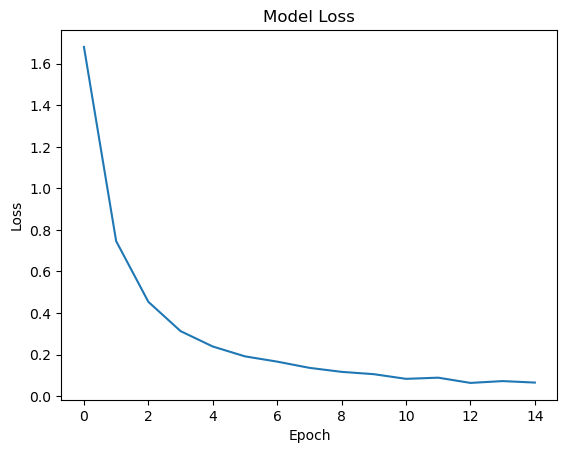

In [44]:
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Assuming `images` and `labels_one_hot` are defined
X_train, X_test, y_train, y_test = train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)

X_train = X_train.reshape(-1, 64, 64, 1)
X_test = X_test.reshape(-1, 64, 64, 1)

# Convert one-hot encoded y_train back to labels
y_train_labels = np.argmax(y_train, axis=1)

def create_model(num_filters=[32, 64], dense_units=128, dropout_rate=0.5):
    model = Sequential([
        layers.Conv2D(num_filters[0], kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(num_filters[1], kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(dense_units, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(y_train.shape[1], activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrap the Keras model in a KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=30, batch_size=32, verbose=0)

# Train the model with the specified hyperparameters
best_params = {'num_filters': (64, 128), 'epochs': 15, 'dropout_rate': 0.6, 'dense_units': 256, 'batch_size': 32}
best_model = create_model(num_filters=best_params['num_filters'], dense_units=best_params['dense_units'], dropout_rate=best_params['dropout_rate'])
history = best_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0)

# Evaluate the model on the test data
y_pred = np.argmax(best_model.predict(X_test), axis=1)

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test_labels, y_pred))

# Plot the loss graph
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test_labels, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       124
           1       0.95      0.90      0.93       144
           2       1.00      1.00      1.00       107
           3       0.94      0.97      0.95       116
           4       0.91      0.93      0.92       118
           5       1.00      0.97      0.98       123
           6       0.97      0.93      0.95       103
           7       0.95      0.99      0.97       119
           8       0.92      0.97      0.95       125
           9       0.99      0.99      0.99       123

    accuracy                           0.96      1202
   macro avg       0.96      0.96      0.96      1202
weighted avg       0.96      0.96      0.96      1202



# Best hyperparameters 96%:
{'num_filters': (64, 128), 'epochs': 15, 'dropout_rate': 0.6, 'dense_units': 256, 'batch_size': 32}

## PCA DATA for FULLY CONNECT NUERAL NETWORK

In [38]:
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Assuming `X_train_pca`, `X_test_pca`, `y_train`, and `y_test` are defined and prepared

# Convert one-hot encoded y_train back to labels

y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)


def create_model(dense1_units=512, dense2_units=256, dropout_rate=0.5):
    model = Sequential([
        layers.Dense(dense1_units, activation='relu', input_shape=(X_train_pca.shape[1],)),
        layers.Dropout(dropout_rate),
        layers.Dense(dense2_units, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(y_train.shape[1], activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrap the Keras model in a KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=32, verbose=0)

# Define the hyperparameter search space
param_grid = {
    'dense1_units': [256, 512],
    'dense2_units': [128, 256],
    'dropout_rate': [0.5, 0.6],
    'epochs': [100, 200],
    'batch_size': [32, 64]
}

# Create the random grid search object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=2, verbose=2, n_jobs=1)

# Perform the random grid search
random_search.fit(X_train_pca, y_train_labels)

# Print the best hyperparameters found
print("Best hyperparameters: ", random_search.best_params_)

# Evaluate the best model on the test data
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_pca)

# Convert predictions to labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert one-hot encoded y_test back to labels
y_test_labels = np.argmax(y_test, axis=1)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print("Accuracy:", accuracy)

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test_labels, y_pred))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END batch_size=32, dense1_units=512, dense2_units=128, dropout_rate=0.6, epochs=100; total time=  33.0s
[CV] END batch_size=32, dense1_units=512, dense2_units=128, dropout_rate=0.6, epochs=100; total time=  32.6s
[CV] END batch_size=64, dense1_units=256, dense2_units=256, dropout_rate=0.6, epochs=200; total time=  42.3s
[CV] END batch_size=64, dense1_units=256, dense2_units=256, dropout_rate=0.6, epochs=200; total time=  36.2s
[CV] END batch_size=32, dense1_units=256, dense2_units=128, dropout_rate=0.6, epochs=200; total time=  44.1s
[CV] END batch_size=32, dense1_units=256, dense2_units=128, dropout_rate=0.6, epochs=200; total time=  44.2s
[CV] END batch_size=64, dense1_units=512, dense2_units=128, dropout_rate=0.5, epochs=200; total time=  40.7s
[CV] END batch_size=64, dense1_units=512, dense2_units=128, dropout_rate=0.5, epochs=200; total time=  40.4s
[CV] END batch_size=32, dense1_units=512, dense2_units=256, dropout

AxisError: axis 1 is out of bounds for array of dimension 1

# Best hyperparameters 95%:  
{'epochs': 200, 'dropout_rate': 0.5, 'dense2_units': 256, 'dense1_units': 512, 'batch_size': 64}

In [39]:

# Evaluate the best model on the test data
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_pca)

# Convert one-hot encoded y_test back to labels
y_test_labels = np.argmax(y_test, axis=1)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test_labels, y_pred)
print("Accuracy:", accuracy)

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test_labels, y_pred))

38/38 [==============================] - 0s 2ms/step
Accuracy: 0.9475873544093179
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       124
           1       1.00      0.89      0.94       144
           2       0.94      0.99      0.96       107
           3       0.90      0.96      0.93       116
           4       0.86      0.91      0.88       118
           5       1.00      0.95      0.97       123
           6       0.99      0.94      0.97       103
           7       0.96      0.99      0.98       119
           8       0.94      0.94      0.94       125
           9       0.97      0.98      0.98       123

    accuracy                           0.95      1202
   macro avg       0.95      0.95      0.95      1202
weighted avg       0.95      0.95      0.95      1202



# K-Means

In [40]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.base import BaseEstimator
from scipy.optimize import linear_sum_assignment

# Custom estimator class
class KMeansClassifier(BaseEstimator):
    def __init__(self, n_clusters=10, random_state=None):
        self.n_clusters = n_clusters
        self.random_state = random_state

    def fit(self, X, y):
        self.clusterer_ = KMeans(n_clusters=self.n_clusters, random_state=self.random_state)
        self.clusterer_.fit(X, y)
        return self

    def predict(self, X):
        return self.clusterer_.predict(X)

    def score(self, X, y):
        return -self.clusterer_.score(X)

# Assuming `images` and `labels_one_hot` are defined
X_train, X_test, y_train, y_test = train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)

X_train = X_train.reshape(-1, 64 * 64)
X_test = X_test.reshape(-1, 64 * 64)

# Convert one-hot encoded y_train and y_test back to labels
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Determine the number of clusters (assuming it's the same as the number of unique labels)
n_clusters = len(np.unique(y_train_labels))

# Set up the hyperparameter search
kmeans_estimator = KMeansClassifier(n_clusters=n_clusters, random_state=42)
param_dist = {
    'n_clusters': [n_clusters-2, n_clusters-1, n_clusters, n_clusters+1, n_clusters+2],
    'random_state': [42, 123, 456]
}

random_search = RandomizedSearchCV(kmeans_estimator, param_distributions=param_dist, n_iter=10, cv=3, random_state=42)

# Fit the model on the training data
random_search.fit(X_train, y_train_labels)


# Get the best model
best_model = random_search.best_estimator_

print(best_model)

# Make predictions on the testing data
y_pred_labels = best_model.predict(X_test)

# Since k-means cluster labels might not match the original labels, we need to find the best mapping between them
conf_mat = confusion_matrix(y_test_labels, y_pred_labels)
row_ind, col_ind = linear_sum_assignment(-conf_mat)  # Maximizes the sum of corresponding values
label_map = dict(zip(col_ind, row_ind))
y_pred_labels_mapped = np.array([label_map[label] for label in y_pred_labels])

# Calculate and print the classification report
print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels_mapped))


KMeansClassifier(n_clusters=8, random_state=456)
Classification Report:
              precision    recall  f1-score   support

           0       0.13      0.27      0.18       124
           1       0.24      0.25      0.25       144
           2       0.35      0.29      0.32       107
           3       0.17      0.23      0.20       116
           4       0.23      0.21      0.22       118
           5       0.12      0.19      0.15       123
           6       0.00      0.00      0.00       103
           7       0.23      0.29      0.26       119
           8       0.18      0.17      0.18       125
           9       0.00      0.00      0.00       123

    accuracy                           0.19      1202
   macro avg       0.17      0.19      0.17      1202
weighted avg       0.17      0.19      0.18      1202



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Best Model Parameters:
n_clusters=8, random_state=456